# Lab 2 : Machine Learning on famous datasets

This webpage is a "Jupyter Notebook" : It is a special type of Python file that you can open and execute using a web browser. This document is made of plain text containing questions and explanations, as well as fields with code, which sometimes will be empty and for you to fill up or to complete.

For a Jupyter Notebook to work properly, you need to run the different code fields after writing them. This means, that unlike in a regular Python file, if you edit something at the beginning of the page, you may have to re-run exerything in order for the effects to apply on all future fields and variables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

## Part A: Iris Dataset

We will start by loading the iris dataset which is pre-integrated in the seaborn library. To do so, we use the command below:

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Question 1 : Display the main characteristics of this dataset (number of lines and columns, as well as attribute types)

In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The iris dataset is one of the oldest dataset in Machine Learning. It contains 150 instances of iris flowers desribed by their sepal length and width, as well as their petal length and width. The iris flowers belong to 3 subspecies : setosa, virginica and versicolor. The goal of Machine Learning applied to this dataset is to identify which subspecies is present based on the petals and sepals characteristics.

#### Question 2 : Is it a regression, a classification or a clustering task ? Justify your answer.

<u>Answer 2 :</u>

*It's a classification task becuase you have to sparate different flower between 3 different group each group have a name.*  

#### Question 3 : Before doing any Machine Learning task, it is highly recommended to visualize the problem. Using a visualization technique of your choice, project the iris dataset and comment on the easiness or difficulty to separate the different subspecies of iris flowers based on the 4 previously mentioned features.

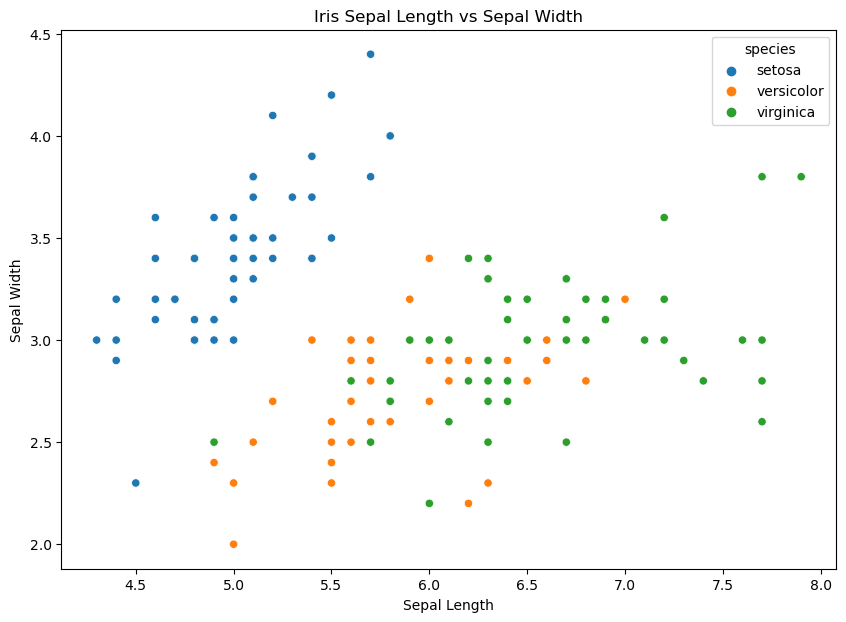

In [5]:
plt.figure(figsize=(10, 7))
plt.title("Iris Sepal Length vs Sepal Width")
sns.scatterplot(x=iris["sepal_length"], y=iris["sepal_width"], hue=iris["species"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureW

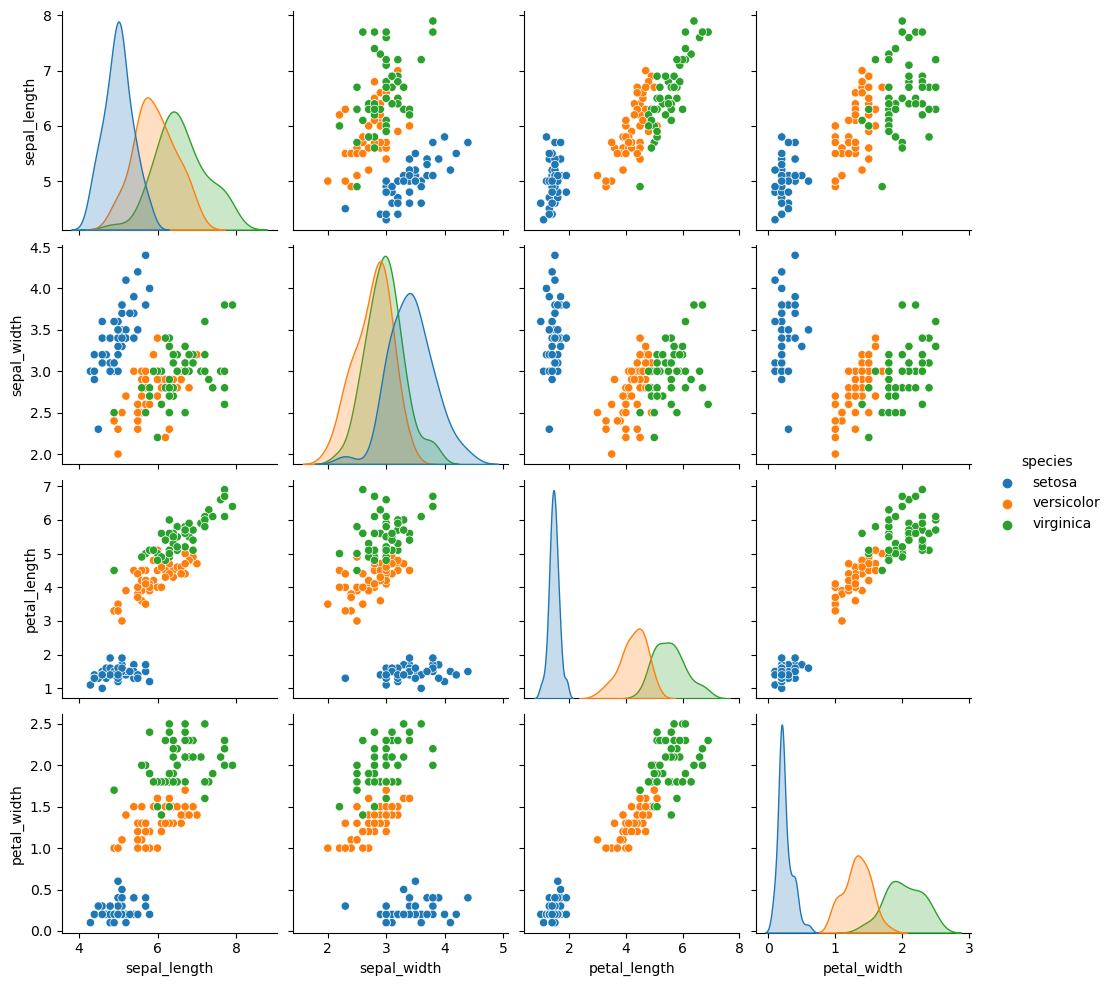

In [6]:
sns.pairplot(iris, hue="species")
plt.show()

<u>Answer 3: </u>

*These 3 species seems to be easily separable in certain cases but here are graphs where there are overlaps.*

Like for the previous lab, we will now prepare the dataset by identifying the following:
- Target variables
- Predictor variables
- Training set (80%)
- Test set (20%)
    
#### Question 4 : Write and run the necessary Python code to create all these variables    

In [7]:
target_variable = "species"
predictor_variables = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
training_data, testing_data = train_test_split(iris, test_size=0.2, random_state=29)
X_train = training_data[predictor_variables]
y_train = training_data[target_variable]
X_test = testing_data[predictor_variables]
y_test = testing_data[target_variable]


We will start by using the KNN algorithm with K=3. This algorithm is identified as *KNeighborsClassifier* in the sklearn library.

#### Question 5 : Load and set-up the KNN algorithm for K=3, and then train it on your training set.

In [8]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### Question 6 : Apply your now trained KNN algorithm to both the training set and the test set for label prediction. Then, compute the precision, recall and F1-score for both training and test sets. Comment on the results.

In [9]:
y_pred_test = KNN.predict(X_test)
y_pred_train = KNN.predict(X_train)

print("Precision on test data: ", metrics.precision_score(y_test, y_pred_test, average='macro'))
print("Recall on test data: ", metrics.recall_score(y_test, y_pred_test, average='macro'))
print("F1-score on test data: ", metrics.f1_score(y_test, y_pred_test, average='macro'))
print("Precision on training data: ", metrics.precision_score(y_train, y_pred_train, average='macro'))
print("Recall on training data: ", metrics.recall_score(y_train, y_pred_train, average='macro'))
print("F1-score on training data: ", metrics.f1_score(y_train, y_pred_train, average='macro'))

Precision on test data:  0.9237472766884531
Recall on test data:  0.9125
F1-score on test data:  0.9170653907496013
Precision on training data:  0.9904761904761905
Recall on training data:  0.9916666666666667
F1-score on training data:  0.9909496728429034


<u>Answer 6 : </u>

*It works better on training set, we call this overfitting.*

#### Question 7 : What would have been the accuracy on the training set if you had chosen K=1 as a parameter for your KNN ?  Would the same happen for the accuracy of the test set ? Justify your answers.

In [10]:
KNN_1 = KNeighborsClassifier(n_neighbors=1)
KNN_1.fit(X_train, y_train)
y_pred_test_1 = KNN_1.predict(X_test)
y_pred_train_1 = KNN_1.predict(X_train)

print("Accuracy on test data: ", accuracy_score(y_test, y_pred_test_1))
print("Accuracy on training data: ", accuracy_score(y_train, y_pred_train_1))

Accuracy on test data:  0.8333333333333334
Accuracy on training data:  1.0


<u>Answer 7:</u>

*If k=1, the model memorizes the training data exactly, which gives perfect precision on the training set but can lead to overfitting and poorer generalization on the test set.*

#### Question 8 : Using a code inspired from last lab, run a decision tree with a maximum depth of 3 on the full iris dataset (without train/test split). Then display the resulting tree. Comment on the splits and results proposed by this tree classifier : do they match with your earlier visualization of the data ? 

[Text(0.375, 0.875, 'petal_length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal_length <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

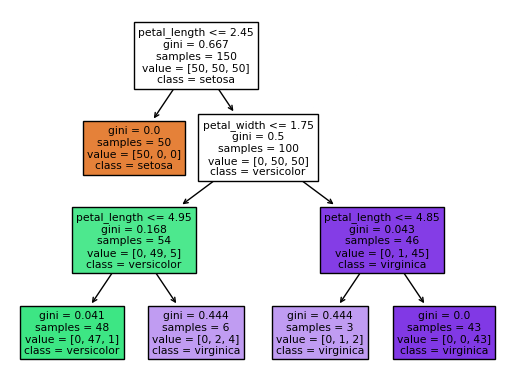

In [11]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
X = iris[predictor_variables]
y = iris[target_variable]
decision_tree.fit(X, y)
plt.plot(figuresize=(20, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=predictor_variables, class_names=iris[target_variable].unique())



<u>Answer 8: </u>

*We can observe which characteristics are the mose discriminating. The tree divides the classes according to the most relevant characteristics.*

#### Question 9 : Compute the quality metrics for this decision tree. Comment on the pros and cons of both classifiers you have tried so far.

In [ ]:
quality_metrics = ["precision", "recall", "f1-score"]
ans = metrics.classification_report(y_test, y_pred_test, target_names=iris[target_variable].unique())
print("Test set:\n",ans)
ans = metrics.classification_report(y_train, y_pred_train, target_names=iris[target_variable].unique())
print("Training set: \n",ans)


Test set:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.89      0.80      0.84        10
   virginica       0.88      0.94      0.91        16

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.92        30
weighted avg       0.90      0.90      0.90        30

Training set: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        46
  versicolor       1.00      0.97      0.99        40
   virginica       0.97      1.00      0.99        34

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<u>Answer 9 : </u> 

*KNN works well for small dataset but is sensitive to the choise of K*  
*The decision tree is more interpretable and can better handle non-linear relationships.*

### Part A.1 : Iris with SVMs

In class we have seen the SVM algorithm (Support Vector Machines) as one of the main Machine Learning algorithm. This algorithm can be used to separate different classes using hyperplanes and sometimes kernel tricks as delimiters. In this subsection, we will apply the SVM algorithm (svm.SVC) from sklearn on the iris dataset.

Our focus here will be not so much on the classification, but rather in showing the decision boundaries made by the classifier between the different classes. Luckily, with only 4 dimensions and well behaved classes that can be almost perfectly separated with only 2 of them, the iris dataset is a good candidate for such visualisation.

#### Question 10 : Train a svm.SVC classifier from sklearn with a linear kernel over the 2 first variables of the full iris dataset (all 150 lines, no split). Then, using the DecisionBoundaryDisplay.from_estimator function, plot the class limits over the first 2 dimensions alongside the points and class projection.

<Figure size 1000x700 with 0 Axes>

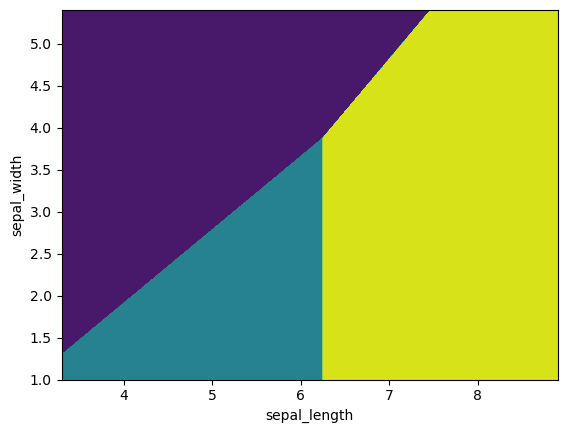

In [52]:
svm_model = svm.SVC(kernel='linear')
predictor_variables_new = ["sepal_length", "sepal_width"]
train_data_new_all_lines = iris.copy()
X_train_new = training_data[predictor_variables_new]
X_test_new = testing_data[predictor_variables_new]
svm_model.fit(X_train_new, y_train)
y_pred_test_svm = svm_model.predict(X_train_new)
plt.figure(figsize=(10, 7))
DecisionBoundaryDisplay.from_estimator(svm_model, X_train_new, grid_resolution=1000, response_method="predict")
plt.show()

#### Question 11 : Same question, but this time with an rbf kernel and gamma=0.7. You will explain the role of the gamma parameter and comment the results compared with the previous projection.

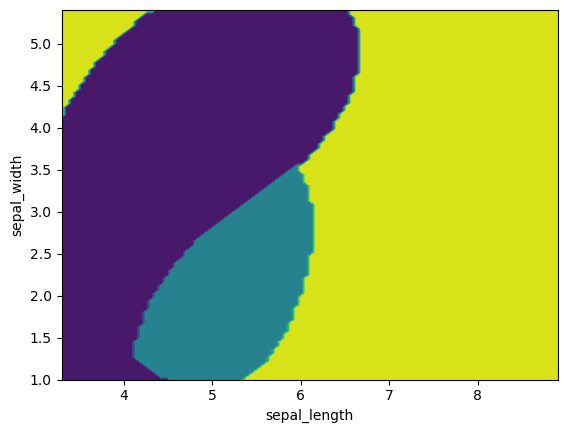

In [53]:
svm_model = svm.SVC(kernel='rbf',gamma=0.7)
predictor_variables_new = ["sepal_length", "sepal_width"]
train_data_new_all_lines = iris.copy()
X_train_new = training_data[predictor_variables_new]
X_test_new = testing_data[predictor_variables_new]
svm_model.fit(X_train_new, y_train)
y_pred_test_svm = svm_model.predict(X_test_new)
DecisionBoundaryDisplay.from_estimator(svm_model, X_train_new)
plt.show()

<u>Answer 11: </u>

*Gamma controls the influence of a given point.*  
*Too high a value leads to overfitting, too low to underfitting.*  

#### Question 12 : Same question with a polynomial kernel of degree 3. Comment on which of the 3 projection seems the best to you. Do you find the SVM or decision tree visualization more convenient ? Why ?

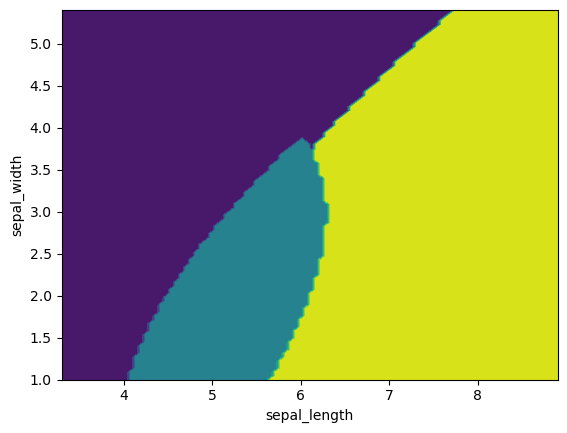

In [55]:
svm_model = svm.SVC(kernel='poly',degree=3)
predictor_variables_new = ["sepal_length", "sepal_width"]
train_data_new_all_lines = iris.copy()
X_train_new = training_data[predictor_variables_new]
X_test_new = testing_data[predictor_variables_new]
svm_model.fit(X_train_new, y_train)
y_pred_test_svm = svm_model.predict(X_test_new)
DecisionBoundaryDisplay.from_estimator(svm_model, X_train_new)
plt.show()

<u>Answer 12 : </u>

*Polynomial SVM is more flexible than linear, but can be more complex to interpret.*

## Part B : WDBC dataset

In this part, we are going to study another very famous but more complex dataset: The Wisconsin Data Breast Cancer (WDBC) for cancer diagnosis.
This dataset features 569 patients, with the following features:
- ID number: Their hospital ID
- Diagnosis (M = malignant, B = benign)
- Ten real-valued features are computed for 3 cell nucleus:
	- radius (mean of distances from center to points on the perimeter)
	- texture (standard deviation of gray-scale values)
	- perimeter
	- area
	- smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
	- concavity (severity of concave portions of the contour)
	- concave points (number of concave portions of the contour)
	- symmetry 
	- fractal dimension ("coastline approximation" - 1)
All feature values are recoded with four significant digits.    

#### Question 1 : Open the wdbc.csv dataset with the correct parameters and check for the number of lines, columns, as well as the type of the variables.

In [92]:
data_wdbc = pd.read_csv("wdbc.csv", header=None)
data_wdbc.shape

(570, 32)

In [93]:
data_wdbc.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173


In [94]:
data_wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       570 non-null    object
 1   1       570 non-null    object
 2   2       570 non-null    object
 3   3       570 non-null    object
 4   4       570 non-null    object
 5   5       570 non-null    object
 6   6       570 non-null    object
 7   7       570 non-null    object
 8   8       570 non-null    object
 9   9       570 non-null    object
 10  10      570 non-null    object
 11  11      570 non-null    object
 12  12      570 non-null    object
 13  13      570 non-null    object
 14  14      570 non-null    object
 15  15      570 non-null    object
 16  16      570 non-null    object
 17  17      570 non-null    object
 18  18      570 non-null    object
 19  19      570 non-null    object
 20  20      570 non-null    object
 21  21      570 non-null    object
 22  22      570 non-null    ob

#### Question 2 : Using Python, figure out how many tested patients have benign/malignant results ?

In [95]:
num_benign = data_wdbc[data_wdbc[1] == 'B'].shape[0]
num_malignant = data_wdbc[data_wdbc[1] == 'M'].shape[0]

num_benign_or_malignant = num_benign + num_malignant
print("Number of benign samples: ", num_benign)
print("Number of malignant samples: ", num_malignant)
print("Number of benign or malignant samples: ", num_benign_or_malignant)

Number of benign samples:  357
Number of malignant samples:  212
Number of benign or malignant samples:  569


#### Question 3 : Is it possible to easily visualize this dataset in the same way as we did for the iris dataset ? If yes do so. If no, justify your answer.

In [100]:

data_wdbc.columns = ['ID number', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave points1', 'symmetry1', 'fractal dimension1', 
					'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave points2', 'symmetry2', 'fractal dimension2', 
					'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave points3', 'symmetry3', 'fractal dimension3']

sns.pairplot(data_wdbc, hue="Diagnosis")
plt.show()

ValueError: No variables found for grid columns.

In [102]:
data_wdbc.head()

,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173


<u>Answer 3:</u>

*WDBC has more dimensions\(30+\), which makes full visualization difficult. However, a PCA can be used to reduce it to 2 dimensions*

#### Question 4 : Using a 80/20 train-test split, train a decision tree, visualize the resulting tree and comment on the performances in both training and test sets.

In [106]:
training_data, testing_data = train_test_split(data_wdbc, test_size=0.2, random_state=29)
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(training_data)
enc.fit(testing_data)

training_data.head()


,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
513,915691,M,13.4,20.52,88.64,556.7,0.1106,0.1469,0.1445,0.08172,...,16.41,29.66,113.3,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.1109
191,874858,M,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,...,15.74,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.1446
103,862965,B,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.0177,...,13.34,32.84,84.58,547.8,0.1123,0.08862,0.1145,0.07431,0.2694,0.06878
109,86355,M,22.27,19.67,152.8,1509,0.1326,0.2768,0.4264,0.1823,...,28.4,28.01,206.8,2360,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
299,892214,B,14.26,18.17,91.22,633.1,0.06576,0.0522,0.02475,0.01374,...,16.22,25.26,105.8,819.7,0.09445,0.2167,0.1565,0.0753,0.2636,0.07676


<u>Answer 4 :</u>

*Your answer*

#### Question 5 : Same question with the SVM algorithm. Remark: Given the high dimensionality, you need not visualize the class boundaries.

<u>Answer 5:</u>

*The decision tree is easier to interpret.*  
*SVM can generalize better on complex data.*  